In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0,'..')
from pv_model import pvAnalysis

# This is path where all the GA results are stored.
path = '../ga/'

pvanalyzer = pvAnalysis.PvAnalyzer(path)
pvanalyzer.grab_processed_files_to_df()
print(pvanalyzer.processed_df.head())




                                            Filename Location Building Name  \
0  ../ga\bc\LargeOffice\0\panel_106_dual_processe...       bc   LargeOffice   
1  ../ga\bc\LargeOffice\0\panel_200_dual_processe...       bc   LargeOffice   
2  ../ga\bc\LargeOffice\0\panel_300_dual_processe...       bc   LargeOffice   
3  ../ga\bc\LargeOffice\0\panel_400_dual_processe...       bc   LargeOffice   
4  ../ga\bc\LargeOffice\1\panel_200_dual_processe...       bc   LargeOffice   

  Run Price   Obj  
0   0   106  dual  
1   0   200  dual  
2   0   300  dual  
3   0   400  dual  
4   1   200  dual  


In [3]:
import os.path
from pathlib import PurePath
import pandas as pd

# Only needed to run once.
# rbf_selection=pvanalyzer.processed_df[pvanalyzer.processed_df["Run"]=="45"]
# all_building_names = rbf_selection["Building Name"].unique()
# print(all_building_names)
# all_prices_names = rbf_selection["Price"].unique()
# print(all_prices_names)
# for b in all_building_names:
#     for p in all_prices_names:
#         rbf_combination = rbf_selection[(rbf_selection["Building Name"]==b) & (rbf_selection["Price"]==p) & (rbf_selection["Obj"]!="dual")]
#         print(rbf_combination)
#         rbf_combined = pd.DataFrame()
#         for f in rbf_combination["Filename"]:
#             df = pd.read_excel(f)
#             rbf_combined = rbf_combined.append(df,ignore_index=True)
#         rbf_combined.pop("Unnamed: 0")
#         rbf_combined["Net-Electricity"]= rbf_combined["Energy Imported"]
#         rbf_combined["totalcost"] = rbf_combined["total_cost"]
#         the_path = PurePath(rbf_combination["Filename"].iloc[0])
#         parts_of_filename = the_path.parts
#         parts_of_new_filename=list(parts_of_filename[:-1])+['panel_'+str(p)+'_dual_processed.xlsx']
#         new_path = '/'.join(parts_of_new_filename)
#         rbf_combined.to_excel(new_path)


In [4]:
pvanalyzer.append_cheapest_solution()
print(pvanalyzer.cheapest_solution_df)

keyerror
                                              Filename Location Building Name  \
0    ../ga\bc\LargeOffice\0\panel_106_dual_processe...       bc   LargeOffice   
1    ../ga\bc\LargeOffice\0\panel_200_dual_processe...       bc   LargeOffice   
2    ../ga\bc\LargeOffice\0\panel_300_dual_processe...       bc   LargeOffice   
3    ../ga\bc\LargeOffice\0\panel_400_dual_processe...       bc   LargeOffice   
4    ../ga\bc\LargeOffice\1\panel_200_dual_processe...       bc   LargeOffice   
..                                                 ...      ...           ...   
402  ../ga\bc\Warehouse\5\panel_400_dual_processed....       bc     Warehouse   
403  ../ga\bc\Warehouse\6\panel_106_dual_processed....       bc     Warehouse   
404  ../ga\bc\Warehouse\6\panel_200_dual_processed....       bc     Warehouse   
405  ../ga\bc\Warehouse\6\panel_300_dual_processed....       bc     Warehouse   
406  ../ga\bc\Warehouse\6\panel_400_dual_processed....       bc     Warehouse   

    Run Price   Ob

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from pv_model import pvAnalysis
import matplotlib

x= np.arange(0,1,0.01)
y = np.sin(x)


path = '../ga/'
pvanalyzer = pvAnalysis.PvAnalyzer(path)
pvanalyzer.grab_processed_files_to_df()
# print(pvanalyzer.processed_df)
pvanalyzer.append_cheapest_solution()
print(pvanalyzer.cheapest_solution_df['Run'].unique())
# pvanalyzer.build_price_graph("LargeOffice","bc","dual",
#                              legend_loc="center left",
#                             demand=True,
#                              roof_top_used=True,
#                             roof_top_constraint=True,Run='45')




fig, axs = plt.subplots(2, 2, figsize=(15,8))
# Start the figure
plt.tick_params(labelsize=14, direction="in")
# Make sure to plot from high to low
font = {'family' : 'Arial',
            'weight' : 'bold',
            'size'   : 16}   
axs[0, 0],axs2 = pvanalyzer.process_axs(axs[0, 0],"LargeOffice","bc","dual",annot="(a)",font=font)

axs[0, 1],axs2 = pvanalyzer.process_axs(axs[0, 1],"MediumOffice","bc","dual",annot="(b)",font=font)

axs[1, 0],axs2 = pvanalyzer.process_axs(axs[1, 0],"SmallOffice","bc","dual",annot="(c)",font=font)

axs[1, 1],axs2 = pvanalyzer.process_axs(axs[1, 1],"Warehouse","bc","dual",annot="(d)",font=font)

plt.subplots_adjust(wspace=.68,hspace=0.40)

handles=[]
labels=[]
for ax in axs2:
    hand, lab = ax.get_legend_handles_labels();
    handles.extend(hand);
    labels.extend(lab);
    
fig.legend(handles, labels, loc='right', facecolor='white',framealpha=1, borderaxespad=0.05);

for ax in axs.flat:
    for tick in ax.get_yticklabels():
        tick.set_fontname("Arial")
        tick.set_fontweight("bold")
        tick.set_fontsize(16)
    for tick in ax.get_xticklabels():
        tick.set_fontname("Arial")
        tick.set_fontweight("bold")
        tick.set_fontsize(16)
 
    ax.set_ylabel('Total Cost ($kCAD / year)',fontdict=font)
    ax.set_xlabel('Price of PV system ($/m²)',fontdict=font)


font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)

    
    
plt.subplots_adjust(right=0.73)
plt.savefig('../paper_images/results_cost_energy_area.pdf', bbox_inches='tight')

keyerror
['0' '1' '4' '43' '45' '5' '6' '7' '2' '12' '13' '20' '30' '31' '35' '37'
 '38' '39' '40' '41' '8' '9']


In [6]:
import matplotlib.pyplot as plt
import numpy as np
from pv_model import pvAnalysis

x= np.arange(0,1,0.01)
y = np.sin(x)


path = '../ga/'
pvanalyzer = pvAnalysis.PvAnalyzer(path)
pvanalyzer.grab_processed_files_to_df()
# print(pvanalyzer.processed_df)
pvanalyzer.append_cheapest_solution()
pvanalyzer.append_lowestimport_solution()
#print(pvanalyzer.cheapest_solution_df['Run'].unique())
# pvanalyzer.build_price_graph("LargeOffice","bc","dual",
#                              legend_loc="center left",
#                             demand=True,
#                              roof_top_used=True,
#                             roof_top_constraint=True)


keyerror
keyerror


In [7]:
sel=pvanalyzer.lowest_import
sel[(sel['Run']=='45') & (sel['Obj']=='dual')].head()

Filename Location Building Name  \
22  ../ga\bc\LargeOffice\45\panel_106_dual_process...       bc   LargeOffice   
25  ../ga\bc\LargeOffice\45\panel_200_dual_process...       bc   LargeOffice   
28  ../ga\bc\LargeOffice\45\panel_300_dual_process...       bc   LargeOffice   
31  ../ga\bc\LargeOffice\45\panel_400_dual_process...       bc   LargeOffice   
69  ../ga\bc\MediumOffice\45\panel_106_dual_proces...       bc  MediumOffice   

   Run Price   Obj        azi0        azi1        azi2      tilt0  ...  \
22  45   106  dual  261.378217  172.307365   90.000000  55.992083  ...   
25  45   200  dual  175.467673  205.759025  115.986080  37.191106  ...   
28  45   300  dual  177.500000  177.500000  177.500000  28.500000  ...   
31  45   400  dual  177.500000  177.500000  177.500000  28.500000  ...   
69  45   106  dual  212.532697  189.977393  106.976861  32.197311  ...   

    Pareto                                         Cost Break  \
22     NaN  {'Levelized Costs': 6207.766103171471, 'Energy...   
25     NaN  {'Levelized Costs': 11712.641036563367, 'Energ...   
28     NaN  {'Levelized Costs': 0.14495042608561448, 'Ener...   
31     NaN  {'Levelized Costs': 0.1449504262020298, 'Energ...   
69     NaN  {'Levelized Costs': 6207.648047002949, 'Energy...   

    Panel Energy Produced  Energy Imported  Roof Area Used  Net-Electricity  \
22           1.336080e+05     5.007937e+06    3.113170e+03     5.007937e+06   
25           1.333321e+05     5.008491e+06    2.764039e+03     5.008491e+06   
28           1.483802e-10     5.141397e+06    1.653627e-12     5.141397e+06   
31           1.483802e-10     5.141397e+06    1.653627e-12     5.141397e+06   
69           1.275361e+05     5.813889e+05    1.660729e+03     5.813889e+05   

        totalcost  violation  pareto-optimal  Unnamed: 0.1  
22  483553.111239        NaN             NaN           NaN  
25  488992.512021        NaN             NaN           NaN  
28  490189.646058        NaN             NaN           NaN  
31  490189.646058        NaN             NaN           NaN  
69   68874.969332        NaN             NaN           NaN  

[5 rows x 31 columns]

# First plot results

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(15,8), dpi=900)
# Start the figure
plt.tick_params(labelsize=14, direction="in")
# Make sure to plot from high to low

axs[0, 0],axs2 = pvanalyzer.process_axs_low(axs[0, 0],"LargeOffice","bc","dual",annot="(a)")

axs[0, 1],axs2 = pvanalyzer.process_axs_low(axs[0, 1],"MediumOffice","bc","dual",annot="(b)")

axs[1, 0],axs2 = pvanalyzer.process_axs_low(axs[1, 0],"SmallOffice","bc","dual",annot="(c)")

axs[1, 1],axs2 = pvanalyzer.process_axs_low(axs[1, 1],"Warehouse","bc","dual",annot="(d)")


plt.subplots_adjust(wspace=.68,hspace=0.40)

handles=[]
labels=[]
for ax in axs2:
    hand, lab = ax.get_legend_handles_labels();
    handles.extend(hand);
    labels.extend(lab);
    
fig.legend(handles, labels, loc='right', facecolor='white',framealpha=1, borderaxespad=0.05);

for ax in axs.flat:
    ax.set(xlabel='Price of the panel ($/m²)', ylabel='Total Cost (10³ $ CAD / year)')

plt.subplots_adjust(right=0.73)
plt.savefig('../paper_images/results_cost_energy_area_low.png', bbox_inches='tight')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


# Data for the abatement table

In [9]:
lowimport = pvanalyzer.lowest_import[(pvanalyzer.lowest_import["Run"]=="45") & (pvanalyzer.lowest_import["Obj"]=="dual") & (pvanalyzer.lowest_import["Price"]!="300")& (pvanalyzer.lowest_import["Price"]!="400")]
cheap = pvanalyzer.cheapest_solution_df[(pvanalyzer.cheapest_solution_df["Run"]=="45") & (pvanalyzer.cheapest_solution_df["Obj"]=="dual") & (pvanalyzer.cheapest_solution_df["Price"]!="300")& (pvanalyzer.cheapest_solution_df["Price"]!="400")]

print(lowimport['Price'])
difference1=lowimport['totalcost']-cheap['totalcost']
# print(difference1)
difference2=lowimport['Energy Imported']-cheap['Energy Imported']
#print(difference2)
difference3=lowimport['Panel Energy Produced']-cheap['Panel Energy Produced']
#print(difference3)
print()

results = pd.DataFrame([cheap['totalcost'],cheap['Panel Energy Produced'],cheap['Energy Imported'],difference1,difference2,difference3])
results.transpose()
colstring=lowimport['Building Name'].values + lowimport['Price'].values
print(colstring)
results.columns = colstring
print(results)
results.to_csv("../incentive_results.csv")
print(cheap['totalcost'])


22     106
25     200
69     106
72     200
336    106
339    200
388    106
391    200
Name: Price, dtype: object

['LargeOffice106' 'LargeOffice200' 'MediumOffice106' 'MediumOffice200'
 'SmallOffice106' 'SmallOffice200' 'Warehouse106' 'Warehouse200']
                       LargeOffice106  LargeOffice200  MediumOffice106  \
totalcost                4.832761e+05    4.887794e+05     68521.054117   
Panel Energy Produced    1.332800e+05    1.333825e+05    132592.084386   
Energy Imported          5.009504e+06    5.009300e+06    614697.568840   
totalcost                2.769639e+02    2.131302e+02       353.915215   
Energy Imported         -1.566996e+03   -8.086830e+02    -33308.627333   
Panel Energy Produced    3.280138e+02   -5.044986e+01     -5055.984533   

                       MediumOffice200  SmallOffice106  SmallOffice200  \
totalcost                 7.142205e+04    3.051845e+03    5.639841e+03   
Panel Energy Produced     7.538434e-07    6.184560e+04    6.184560e+04   
Energy

In [10]:
cheap = pvanalyzer.cheapest_solution_df[(pvanalyzer.cheapest_solution_df["Run"]=="45") & (pvanalyzer.cheapest_solution_df["Obj"]=="dual") & (pvanalyzer.cheapest_solution_df["Price"]=="400")]
cheap.to_csv("../use_cost.csv")

# How do the configurations change with the abatement

keyerror
keyerror


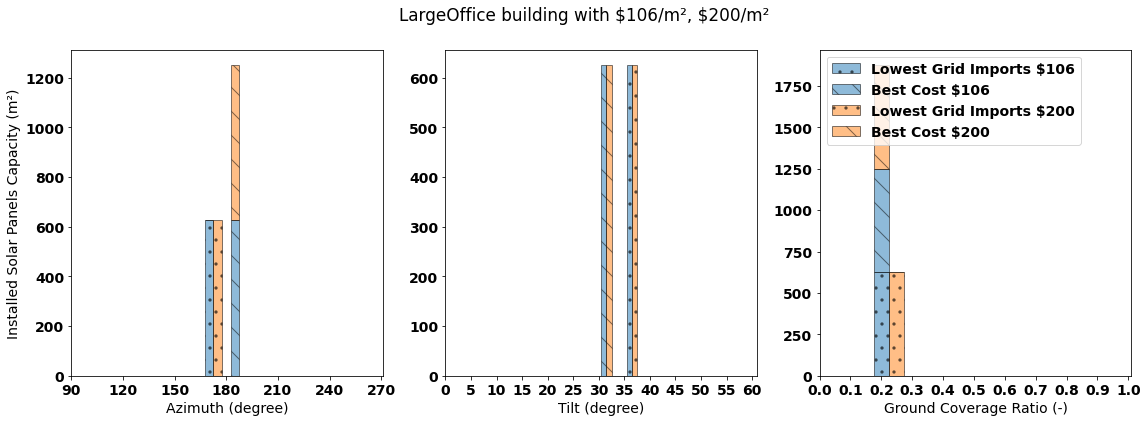

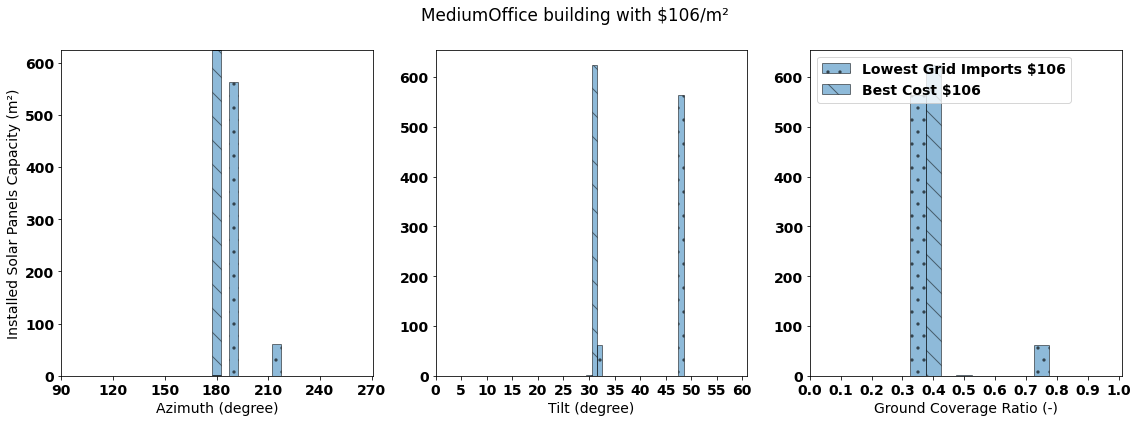

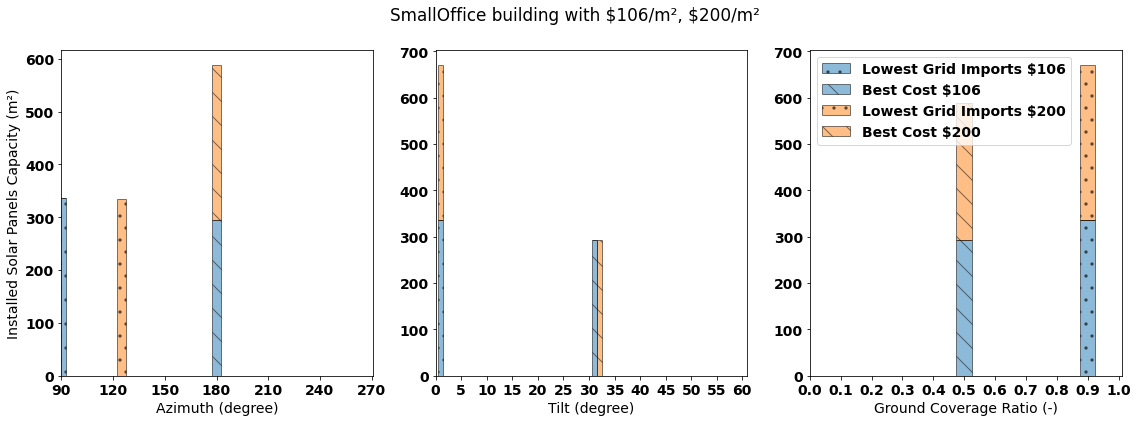

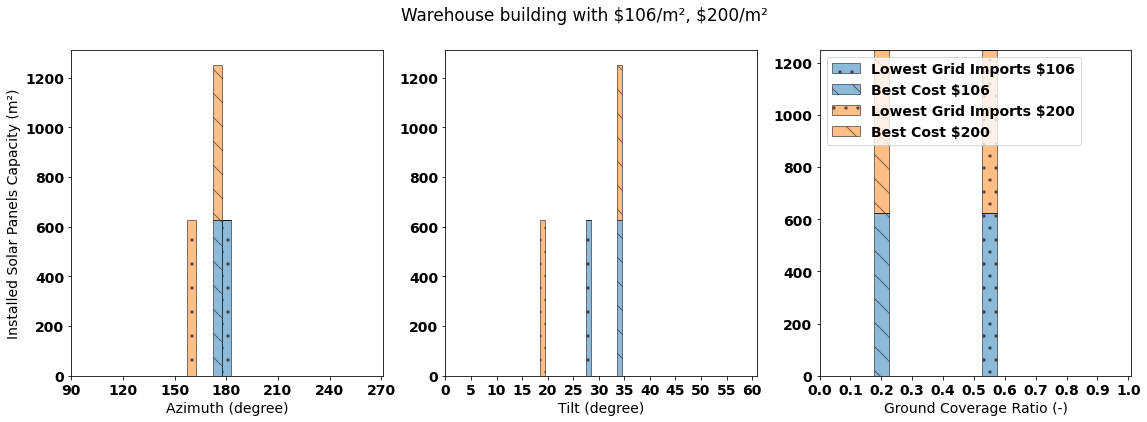

In [11]:
import sys
sys.path.insert(0,'..')
from pv_model import pvAnalysis
import matplotlib.pyplot as plt
# This is path where all the GA results are stored.
path = '../ga/'

pvanalyzer = pvAnalysis.PvAnalyzer(path)
pvanalyzer.grab_processed_files_to_df()
pvanalyzer.append_cheapest_solution()
pvanalyzer.append_lowestimport_solution()

ax_large=pvanalyzer.configs_fused("LargeOffice","bc",
                               "dual",["106","200"],
                               sep_axis=True,hista=False)
plt.savefig('../paper_images/results_configs_fused_large.pdf', bbox_inches='tight')


ax_med=pvanalyzer.configs_fused("MediumOffice","bc",
                               "dual",["106"],
                               sep_axis=True,hista=False)
plt.savefig('../paper_images/results_configs_fused_med.pdf', bbox_inches='tight')

ax_small=pvanalyzer.configs_fused("SmallOffice","bc",
                               "dual",["106","200"],
                               sep_axis=True,hista=False)
plt.savefig('../paper_images/results_configs_fused_small.pdf', bbox_inches='tight')

ax_ware=pvanalyzer.configs_fused("Warehouse","bc",
                               "dual",["106","200"],
                               sep_axis=True,hista=False)
plt.savefig('../paper_images/results_configs_fused_war.pdf', bbox_inches='tight')

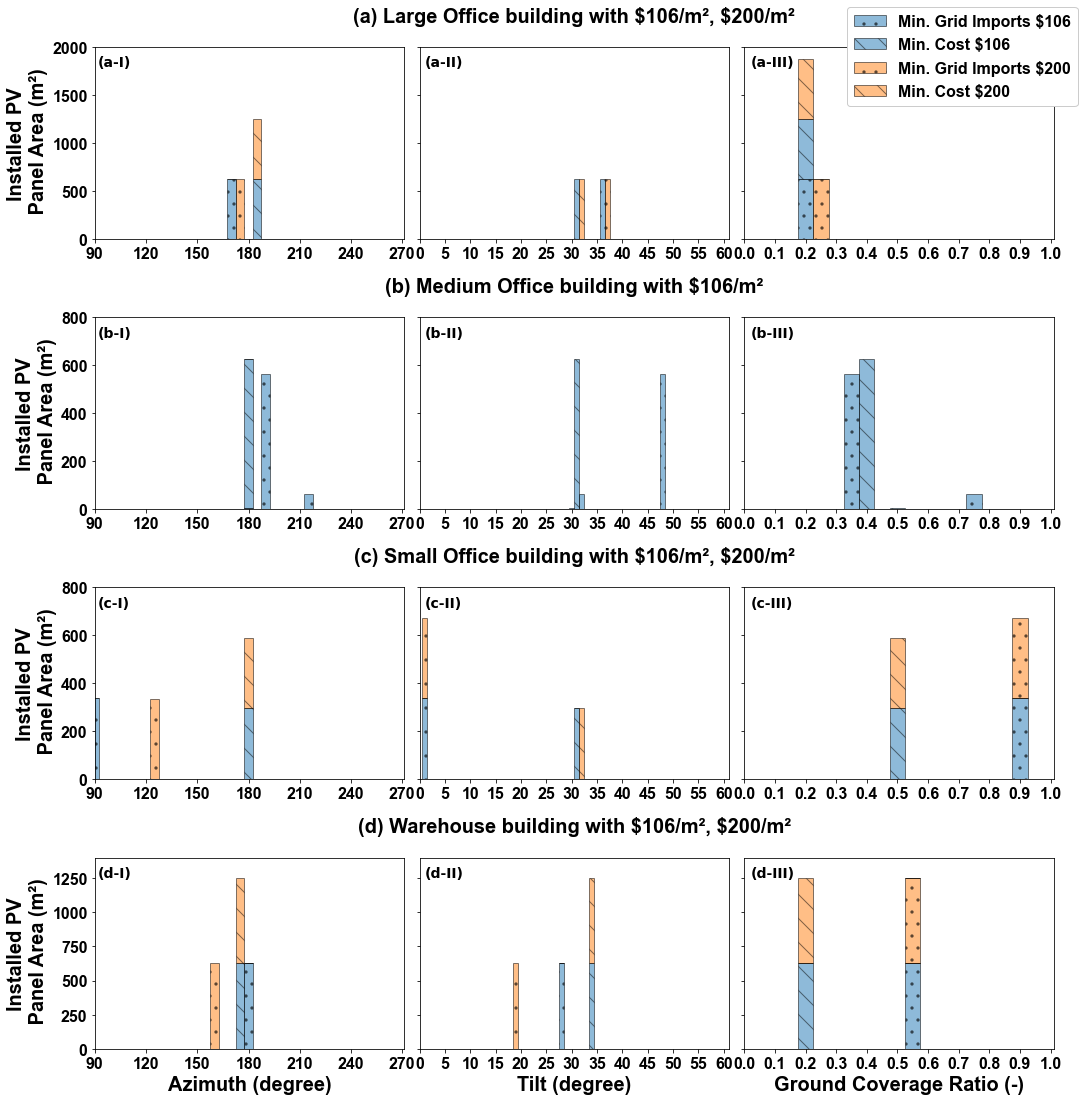

In [12]:
s_r=0.8
figs, axes = plt.subplots(ncols=3, nrows=4, constrained_layout=True,figsize=(19*s_r,19*s_r), sharey=False)
axes[0,:],figs=pvanalyzer.configs_fused_single("LargeOffice","bc", 
                               "dual",["106","200"],
                               sep_axis=True,hista=False,ax=axes[0,:],fig=figs,max_y_val=2000,
                                               turn_on_xaxis_title=False, pre_emble="(a) Large Office")

axes[1,:],figs=pvanalyzer.configs_fused_single("MediumOffice","bc",
                               "dual",["106"],
                               sep_axis=True,hista=False,ax=axes[1,:],fig=figs,max_y_val=800,
                                               turn_on_xaxis_title=False, pre_emble="(b) Medium Office")

axes[2,:],figs=pvanalyzer.configs_fused_single("SmallOffice","bc", 
                               "dual",["106","200"],
                               sep_axis=True,hista=False,ax=axes[2,:],fig=figs,max_y_val=800,
                                               turn_on_xaxis_title=False, pre_emble="(c) Small Office")

axes[3,:],figs=pvanalyzer.configs_fused_single("Warehouse","bc",
                               "dual",["106","200"],
                               sep_axis=True,hista=False,ax=axes[3,:],fig=figs,
                                legend_toggle=True,max_y_val=1400,
                                turn_on_xaxis_title=True, pre_emble="(d) Warehouse")

for ax in axes.flat:
    for tick in ax.get_yticklabels():
        tick.set_fontname("Arial")
        tick.set_fontweight("bold")
        tick.set_fontsize(16)
    for tick in ax.get_xticklabels():
        tick.set_fontname("Arial")
        tick.set_fontweight("bold")
        tick.set_fontsize(16)
plt.tight_layout()
figs.subplots_adjust(wspace=0.05)
plt.subplots_adjust(top=0.97)
plt.subplots_adjust(right=0.97)

plt.savefig('../paper_images/all_configs.pdf', bbox_inches='tight')

In [13]:
ax_large[0]._axes